# 0. An Analysis of Women's Risk of Stroke 
# By Tenealle Sloan

# 1. Progress Update Summary

I have completed data selection and preprocessing, data cleaning, the logistic regression model, the 4 models for my analysis, and the cost function graph for each model. As of writing this I am on schedule and have completed all of my tasks for the first few weeks of this project. I am on schedule because I have finished half of all of the tasks that I listed in my Project Proposal.

## 1.1 Research Objective

Demonstrating the comparisons on women's risk of stroke induced by anxiety to men's stroke induced by anxiety to guage whether anxiety is more prevelant in the women in this dataset, and whether that anxiety correlates with stroke at an increased level for women.

## 1.2 Project Timeline

 Week 1: Picking the features to the focus and handling duplicates in the data set, then taking the results to guage the viability of the remaining data.
 
 Week 2: Setting the features and scaling the data set. Thereafter, splitting the data set into Training and Testing. During this time period I also had to create a second logistic regression model because there are two target features this project needs to focus on, percentage risk of stroke (float) and at risk of stroke (binary).
 
 Week 3: (Do this when you finish Week 3, also you're a little behind).


# 2. Methodlogy

## 2.1 Data Selection and Preprocessing

### 2.1.1 Feature Selection

Key features for women's logistic regression models: Age, Gender, High Blood Pressure, Anxiety, Anxiety, Irregular Heartbeat, Fatigue, Percentage Risk of Stroke, and At Risk.

Key features for men's logistic regression models: Age, Gender, Anxiety, Percentage Risk of Stroke, and At Risk.

### 2.1.2 Data Cleaning

No missing data. Over 10,000+ rows of duplicate data removed from the logistic regression model training and testing data. The integrity of the women's logistic regression model remains, however the men's decreased by a large amount.

In [14]:
import pandas as pd
import numpy as np
import sklearn #library
from io import StringIO
import sys
from sklearn.impute import SimpleImputer

Attributes I want to focus on:
- Women
- Age (18-50)
- Blood Pressure
- Anxiety

Secondary attributes:
- Irregular Heartbeat
- Weakness/Fatigue

Analysis:
- Comparative analysis on anxiety and percentage risk of stroke in men (18-50), and anxiety and percentage risk of stroke in women(18-50) to compare whether anxiety disproprtionality affects women's risk of stroke compared to men and the real world implications of the analysis.
- (Another real world experience that can be explained by the dataset).

# Removing Features, Duplicates, and Missing Data

In [17]:
df = pd.read_csv("stroke_risk_dataset_v2.csv")
df

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
0,22,Male,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,33.3,0
1,52,Male,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,100.0,1
2,63,Female,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,100.0,1
3,41,Male,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,44.5,0
4,53,Male,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,84.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,32,Female,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,15.7,0
34996,29,Female,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,19.3,0
34997,44,Female,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,46.8,0
34998,28,Female,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,13.9,0


In [18]:
#Removing Rows and Columns to create Female Focused Dataframe
new_df = df[df['gender'] == 'Female']
df_dropped_cols = new_df.drop(['shortness_of_breath', 'dizziness', 'swelling_edema', 'neck_jaw_pain', 'excessive_sweating', 'persistent_cough','nausea_vomiting', 'chest_discomfort', 'cold_hands_feet', 'snoring_sleep_apnea'], axis = 1)
df_selected_cols = new_df[['age', 'gender', 'high_blood_pressure', 'irregular_heartbeat', 'fatigue_weakness', 'anxiety_doom', 'stroke_risk_percentage', 'at_risk']]
#print(df_dropped_cols)
#print(df_selected_cols)
new_df = df_selected_cols
print(new_df)
female_df = new_df
female_df = female_df.drop(['gender'], axis = 1)

       age  gender  high_blood_pressure  irregular_heartbeat  \
2       63  Female                    1                    0   
5       28  Female                    0                    0   
9       40  Female                    0                    0   
12      27  Female                    0                    0   
14      30  Female                    0                    0   
...    ...     ...                  ...                  ...   
34994   32  Female                    0                    0   
34995   32  Female                    0                    0   
34996   29  Female                    0                    0   
34997   44  Female                    0                    0   
34998   28  Female                    0                    0   

       fatigue_weakness  anxiety_doom  stroke_risk_percentage  at_risk  
2                     0             0                   100.0        1  
5                     0             0                    13.9        0  
9           

In [19]:
#Removing Rows and Columns from the original dataset to make Dataframe focused on Male Anxiety
male_df = df[df['gender'] == 'Male']
df_dropped_cols = male_df.drop(['chest_pain', 'high_blood_pressure', 'irregular_heartbeat', 'shortness_of_breath', 'fatigue_weakness', 'dizziness'
                         , 'swelling_edema', 'neck_jaw_pain', 'excessive_sweating', 'persistent_cough', 'nausea_vomiting', 'chest_discomfort',
                         'cold_hands_feet', 'snoring_sleep_apnea'], axis = 1)
df_selected_cols = male_df[['age', 'gender', 'anxiety_doom', 'stroke_risk_percentage', 'at_risk']]
male_df = df_selected_cols
male_df = male_df.drop(['gender'], axis = 1)

In [20]:
#Removing rows with missing values completely because I don't want to fill in missing data points 
#because it is medical data and I want to look at a fully formed individual.
female_df.isnull().sum()
#No missing values found.

age                       0
high_blood_pressure       0
irregular_heartbeat       0
fatigue_weakness          0
anxiety_doom              0
stroke_risk_percentage    0
at_risk                   0
dtype: int64

In [21]:
male_df.isnull().sum()
#No missing value found

age                       0
anxiety_doom              0
stroke_risk_percentage    0
at_risk                   0
dtype: int64

In [22]:
#Dropping Duplicate Data
female_df = female_df.drop_duplicates(keep='first')
female_df

,age,high_blood_pressure,irregular_heartbeat,fatigue_weakness,anxiety_doom,stroke_risk_percentage,at_risk
2,63,1,0,0,0,100.0,1
5,28,0,0,0,0,13.9,0
9,40,0,0,0,0,41.9,0
12,27,0,0,0,0,3.6,0
14,30,0,0,0,0,4.7,0
...,...,...,...,...,...,...,...
34881,51,0,0,1,0,43.9,0
34895,42,0,0,0,1,64.2,1
34918,31,1,1,1,0,55.7,1
34951,55,1,0,1,1,85.3,1


In [23]:
male_df = male_df.drop_duplicates(keep = 'first')
male_df

,age,anxiety_doom,stroke_risk_percentage,at_risk
0,22,0,33.3,0
1,52,0,100.0,1
3,41,0,44.5,0
4,53,0,84.8,1
6,37,0,43.7,0
...,...,...,...,...
34133,39,1,71.4,1
34260,25,0,51.9,1
34273,25,0,21.9,0
34453,22,0,44.3,0


Viability of the dataset based on the removal of duplicates and missing values:
Testing the linkage between the features of female_df should be viable because the values are unique, however the possibility of removing ages outside of 18-50 is not viable because there would not be enough data to consider the logistic regression model valid.
When it comes to male_df, I am considering another way to remove the duplicates because of how much the dataset decreased due to the removal of duplicates.

# Logistic Regression Model

In [26]:
class LogisticRegression:
    def __init__(self, eta=0.01, n_epochs = 100, random_state = 1):
        self.eta = eta
        self.n_epochs = n_epochs
        self.random_state = random_state

    def net_input(self, x):
        """Compute linear combination of x and weights"""
        return np.dot(self.w_.T, x) + self.b_
        
    def sigmoid(self, z):
        """Compute logistic sigmoid activation"""
        return 1.0/(1.0 + np.exp(-np.clip(z, -250, 250)))

    def predict(self, x):
        """Predict class label of x"""
        z = self.net_input(x)
        return np.where(self.sigmoid(z) >= 0.5, 1, 0) 

    def loss_function(self, a, y):
        """Compute the loss function"""
        return -(y * (np.log(a)) + (1 - y) * (np.log(1 - a)))

    def fit(self, X, Y):
        """
        Training the logistic regression model with the given dataset using gradient descent.
        
        Parameters:
        X : {array-like}, shape = [n_objects, m_features]
            The m by n input feature matrix, where each row is a training example (object), and each column is a feature.
            The total number of rows (m_examples) represents the total number of objects .
            The total number of columns (n_features) represents the total number of predictor variables.
        Y : {array-like}, shape = [n_objects, 1]
            Target values or class labels.
            i'th value of Y corresponds to i'th row in X 
        """
        # 1) intialize the weights and bias
        rgen = np.random.RandomState(self.random_state) # create an instance of random number generator
        self.m_features_ = X.shape[1] # get the number of predictor variables (features)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=self.m_features_) ## an instance attribute for the weights of the Perceptron
        self.b_ = np.float_(0.) ## an instance attribute for the bias value

        print(self.w_)
        print(self.w_.T)
        
        # 2) gradient descent
        self.costs_ = [] ## logging cost function value in each epoch
        
        for i in range(self.n_epochs):
    
            L = 0.0 ## for cost function value
            dw = np.zeros(self.m_features_)
            db = 0.0 
            for x, y in zip(X, Y):
                z = self.net_input(x)
                
                a = self.sigmoid(z)

                L += self.loss_function(a, y)

                dz = a - y
                
                dw += x*dz
                db += dz
            
            self.costs_.append(L/X.shape[0])
          
            n = X.shape[0]
            dw = dw/n
            db = db/n
            
            self.w_ = self.w_-self.eta*dw
            
            self.b_ = self.b_-self.eta*db
        return self

# Linear Regression Model

#### Gradient Descent seems like the better choice, because this dataset has high dimensionality.

In [29]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_epochs = 100, random_state=42):
        self.eta = eta
        self.n_epochs = n_epochs
        self.random_state = random_state

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return self.net_input(X)

    def fit(self, X, Y):
        # 1) intialize the weights and bias
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])

        # keeping track of the cost function value in each epoch
        self.costs_ = []

        #repeat for n_epochs
        for i in range(self.n_epochs):
            Y_hat = self.net_input(X)
            errors = Y_hat - Y
            self.costs_.append((errors**2).mean())
            
            dw = X.T.dot(errors)/X.shape[0]
            self.w_ -= self.eta * dw
            
            db = np.sum(errors)/X.shape[0]
            self.b_ -= self.eta * db
            
        return self

### Training and testing the first target variable (Stroke Risk Percentage)

In [31]:
#Splitting dataset into Train and Test
#Only working on female_df dataset for now
from sklearn.model_selection import train_test_split

# Split df into features (X) and labels (y)
X = female_df[['age', 'high_blood_pressure', 'irregular_heartbeat', 'fatigue_weakness', 'anxiety_doom']].values
Y = female_df['stroke_risk_percentage'].values  # Target label (last two columns)
#Standardizing
#No class mapping needed
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
Y_std = sc_y.fit_transform(Y[:, np.newaxis]).flatten()
# Split the dataset into training and testing sets
# test_size=0.2 means 80% training, 20% testing
X_f1_train, X_f1_test, Y_f1_train, Y_f1_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display the shape of the splits
print(f"Training data shape (X_train): {X_f1_train.shape}, (Y_f1_train): {Y_f1_train.shape}")
print(f"Testing data shape (X_test): {X_f1_test.shape}, (Y_f1_test): {Y_f1_test.shape}")
print(f'type(X_train): {type(X_f1_train)}')
print(f'type(Y_train): {type(Y_f1_train)}')
print(f'type(X_test): {type(X_f1_test)}')
print(f'type(Y_test): {type(Y_f1_test)}')

Training data shape (X_train): (2667, 5), (Y_f1_train): (2667,)
Testing data shape (X_test): (667, 5), (Y_f1_test): (667,)
type(X_train): <class 'numpy.ndarray'>
type(Y_train): <class 'numpy.ndarray'>
type(X_test): <class 'numpy.ndarray'>
type(Y_test): <class 'numpy.ndarray'>


In [32]:
X = male_df[['age', 'anxiety_doom']].values
Y = male_df['stroke_risk_percentage'].values  # Target label (last two columns)

X_m1_train, X_m1_test, Y_m1_train, Y_m1_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display the shape of the splits
print(f"Training data shape (X_train): {X_m1_train.shape}, (Y_m1_train): {Y_m1_train.shape}")
print(f"Testing data shape (X_test): {X_m1_test.shape}, (Y_m1_test): {Y_m1_test.shape}")
print(f'type(X_train): {type(X_m1_train)}')
print(f'type(Y_train): {type(Y_m1_train)}')
print(f'type(X_test): {type(X_m1_test)}')
print(f'type(Y_test): {type(Y_m1_test)}')

Training data shape (X_train): (1169, 2), (Y_m1_train): (1169,)
Testing data shape (X_test): (293, 2), (Y_m1_test): (293,)
type(X_train): <class 'numpy.ndarray'>
type(Y_train): <class 'numpy.ndarray'>
type(X_test): <class 'numpy.ndarray'>
type(Y_test): <class 'numpy.ndarray'>


### Training and testing the second target variable (At Risk)

In [34]:
X = female_df[['age', 'high_blood_pressure', 'irregular_heartbeat', 'fatigue_weakness', 'anxiety_doom']].values
Y = female_df['at_risk'].values  # Target label (last two columns)

X_f2_train, X_f2_test, Y_f2_train, Y_f2_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Training data shape (X_train): {X_f2_train.shape}, (Y_f2_train): {Y_f2_train.shape}")
print(f"Testing data shape (X_test): {X_f2_test.shape}, (Y_f2_test): {Y_f2_test.shape}")
print(f'type(X_train): {type(X_f2_train)}')
print(f'type(Y_train): {type(Y_f2_train)}')
print(f'type(X_test): {type(X_f2_test)}')
print(f'type(Y_test): {type(Y_f2_test)}')

Training data shape (X_train): (2667, 5), (Y_f2_train): (2667,)
Testing data shape (X_test): (667, 5), (Y_f2_test): (667,)
type(X_train): <class 'numpy.ndarray'>
type(Y_train): <class 'numpy.ndarray'>
type(X_test): <class 'numpy.ndarray'>
type(Y_test): <class 'numpy.ndarray'>


In [35]:
X = male_df[['age', 'anxiety_doom']].values
Y = male_df['at_risk'].values  # Target label (last two columns)

X_m2_train, X_m2_test, Y_m2_train, Y_m2_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Training data shape (X_train): {X_m2_train.shape}, (Y_m2_train): {Y_m2_train.shape}")
print(f"Testing data shape (X_test): {X_m2_test.shape}, (Y_m2_test): {Y_m2_test.shape}")
print(f'type(X_train): {type(X_m2_train)}')
print(f'type(Y_train): {type(Y_m2_train)}')
print(f'type(X_test): {type(X_m2_test)}')
print(f'type(Y_test): {type(Y_m2_test)}')

Training data shape (X_train): (1169, 2), (Y_m2_train): (1169,)
Testing data shape (X_test): (293, 2), (Y_m2_test): (293,)
type(X_train): <class 'numpy.ndarray'>
type(Y_train): <class 'numpy.ndarray'>
type(X_test): <class 'numpy.ndarray'>
type(Y_test): <class 'numpy.ndarray'>


### MSE Heatmap

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
X_f1_train_std = sc_x.fit_transform(X_f1_train)
Y_f1_train_std = sc_y.fit_transform(Y_f1_train.reshape((-1, 1)))
Y_f1_train_std = Y_f1_train_std.flatten()

pipe_f1 = make_pipeline(StandardScaler(),
                        RandomForestRegressor(max_depth = 10, min_samples_leaf = 4, 
                                              min_samples_split = 10, n_estimators = 200, 
                                              random_state = 42))
pipe_f1 = pipe_f1.fit(X_f1_train_std, Y_f1_train_std)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


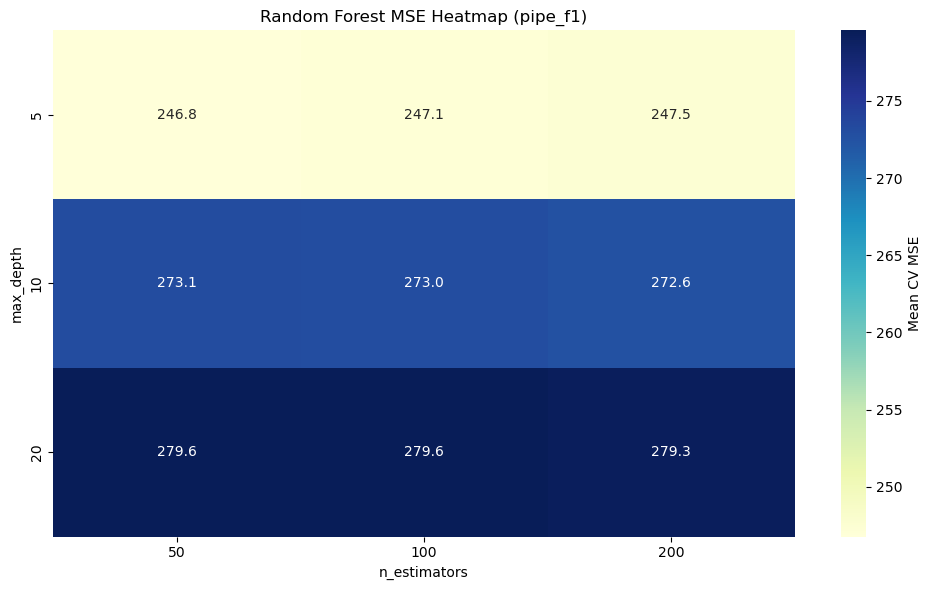

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pipe_rf = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=42)
)

param_grid_rf = {
    'randomforestregressor__n_estimators': [50, 100, 200],
    'randomforestregressor__max_depth': [None, 5, 10, 20],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4]
}

gs_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid_rf,
    scoring='neg_mean_squared_error',
    cv=10,
    n_jobs=-1,
    verbose=1
)

gs_rf.fit(X_f1_train, Y_f1_train)

results_f1 = pd.DataFrame(gs_rf.cv_results_)
results_f1['mean_test_mse'] = -results_f1['mean_test_score']

heatmap_data = results_f1.pivot_table(
    index='param_randomforestregressor__max_depth',
    columns='param_randomforestregressor__n_estimators',
    values='mean_test_mse'
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Mean CV MSE'})
plt.title("Random Forest MSE Heatmap (pipe_f1)")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.tight_layout()
plt.show()

In [40]:
X_m1_train_std = sc_x.fit_transform(X_m1_train)
Y_m1_train_std = sc_y.fit_transform(Y_m1_train.reshape((-1, 1)))
Y_m1_train_std = Y_m1_train_std.flatten()

pipe_rf = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=42)
)

param_grid_rf = {
    'randomforestregressor__n_estimators': [50, 100, 200],
    'randomforestregressor__max_depth': [None, 5, 10, 20],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4]
}

gs_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid_rf,
    scoring='neg_mean_squared_error',
    cv=10,
    n_jobs=-1,
    verbose=1
)

gs_rf.fit(X_m1_train, Y_m1_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 5, 10, 20],
                         'randomforestregressor__min_samples_leaf': [1, 2, 4],
                         'randomforestregressor__min_samples_split': [2, 5, 10],
                         'randomforestregressor__n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

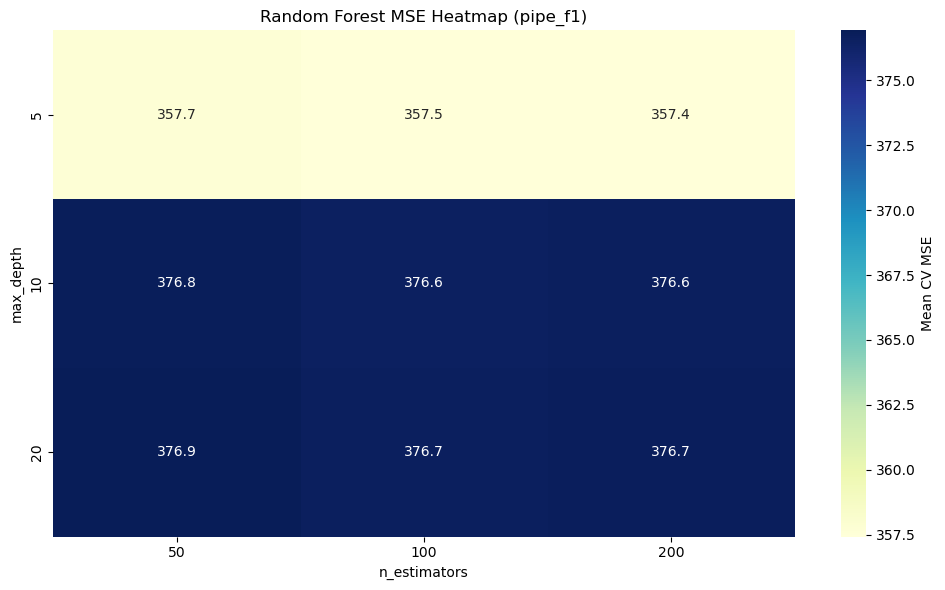

In [41]:
results_m1 = pd.DataFrame(gs_rf.cv_results_)
results_m1['mean_test_mse'] = -results_m1['mean_test_score']

heatmap_data = results_m1.pivot_table(
    index='param_randomforestregressor__max_depth',
    columns='param_randomforestregressor__n_estimators',
    values='mean_test_mse'
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Mean CV MSE'})
plt.title("Random Forest MSE Heatmap (pipe_f1)")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.tight_layout()
plt.show()

### Cost function evaluation

#### Second Target Variable

In [44]:
X_f2_train_std = sc_x.fit_transform(X_f2_train)
Y_f2_train_std = sc_y.fit_transform(Y_f2_train.reshape((-1, 1)))


lrm_f2 = LogisticRegression(eta = 0.01, n_epochs = 100, random_state = 100)
lrm_f2 = lrm_f2.fit(X_f2_train_std, Y_f2_train_std)

[-0.01749765  0.0034268   0.01153036 -0.00252436  0.00981321]
[-0.01749765  0.0034268   0.01153036 -0.00252436  0.00981321]


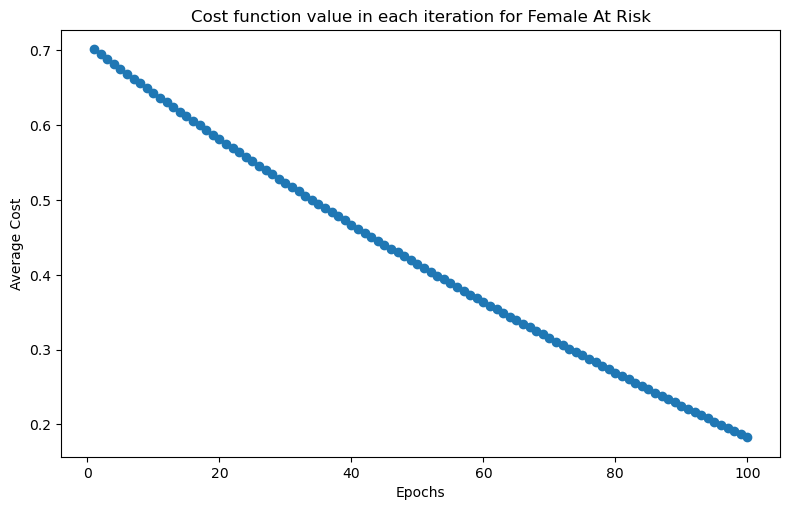

In [45]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(lrm_f2.costs_) + 1), lrm_f2.costs_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.title('Cost function value in each iteration for Female At Risk')
plt.show()

In [46]:
X_m2_train_std = sc_x.fit_transform(X_m2_train)
Y_m2_train_std = sc_y.fit_transform(Y_m2_train.reshape((-1, 1)))


lrm_m2 = LogisticRegression(eta = 0.01, n_epochs = 100, random_state = 100)
lrm_m2 = lrm_m2.fit(X_m2_train_std, Y_m2_train_std)

[-0.01749765  0.0034268 ]
[-0.01749765  0.0034268 ]


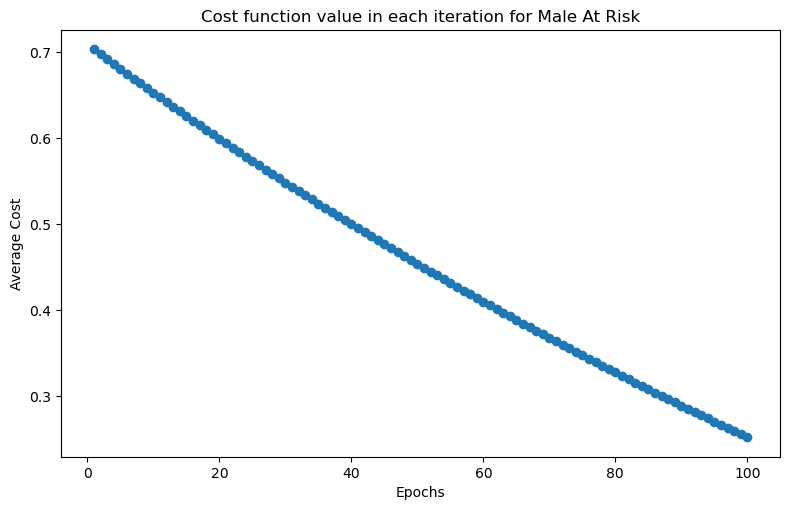

In [47]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(lrm_m2.costs_) + 1), lrm_m2.costs_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.title('Cost function value in each iteration for Male At Risk')
plt.show()

# Visualizing Real-World Comparisons